In [45]:
import jax.numpy as jnp
import numpy as np
from jax import jit
from typing import Union
import matplotlib.pyplot as plt

plt.style.use("dark_background")

Array = Union[jnp.ndarray, np.ndarray]


This notebook will make the point of the speedup with the jax backend.

from JAX documentation:
> What’s new is that JAX uses Google's [XLA](https://www.tensorflow.org/xla) to compile and run your NumPy code on accelerators, like GPUs and TPUs. Compilation happens under the hood by default, with library calls getting just-in-time compiled and executed. But JAX even lets you just-in-time compile your own Python functions into XLA-optimized kernels using a one-function API

from the XLA documentation:
> XLA (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra

I will showcase this with a linear function $f(X) = WX + b$

In [46]:
W = np.random.rand(10, 1000)
b = np.random.rand(1000)
X = np.random.rand(32, 10)


In [47]:
def linear(X: Array) -> Array:
    return np.dot(X, W) + b


def jax_linear(X: Array) -> Array:
    return jnp.dot(X, W) + b


results = {}


As you can see, `jnp` implements the `numpy` API. This makes it very easy to port code from numpy to JAX.
Let's time both functions.

In [48]:
results["linear"] = %timeit -o linear(X)

61 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [49]:
results["jax_linear"] = %timeit -o jax_linear(X)

44.1 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Numpy uses a `C` backend, which is pretty fast.
However, JAX is slightly faster. Let's compile the function with `jit`

In [50]:
linear_jit = jit(jax_linear)


In [51]:
results["jit"] = %timeit -o linear_jit(X).block_until_ready()

24.4 µs ± 583 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<BarContainer object of 3 artists>

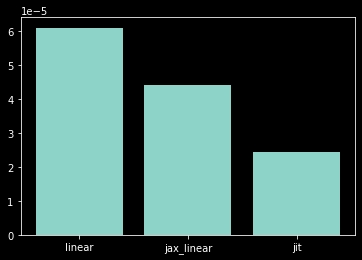

In [52]:
y = [r.average for r in results.values()]
plt.bar(results.keys(), y)


That is already twice as fast as the numpy code!
Let's see how this scales. We add a factor 10 the the features:

In [53]:
W = np.random.rand(10, 10000)
b = np.random.rand(10000)
results = {}


In [54]:
results["linear"] = %timeit -o linear(X)

458 µs ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
results["jit"] = %timeit -o linear_jit(X).block_until_ready()

25.7 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<BarContainer object of 2 artists>

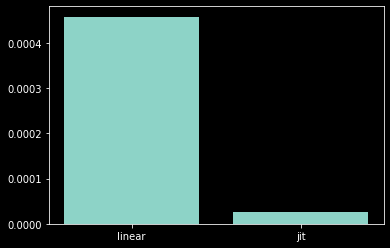

In [56]:
y = [r.average for r in results.values()]
plt.bar(results.keys(), y)


Here you can see, how JAX really outperforms numpy...
There might be usecases where numpy is faster, depending on the scale of your problem, but in general JAX will have the upper hand.